In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [3]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                        cov=0.1,
                        n_samples=N,
                        n_features=2,
                        n_classes=2,
                        shuffle=True,
                        random_state=None)
X, Y = gaussian_quantiles
Y = Y.reshape(-1,1)

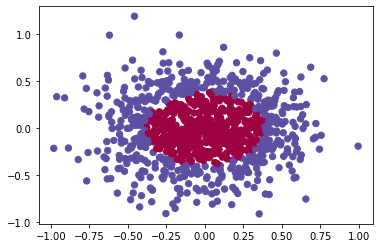

In [4]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)
plt.show()

### Función de Activación

In [5]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:    
        return np.maximum(0,x)

### Función de Pérdida

In [6]:
def mse(y,y_hat,derivate=False):
    if derivate:
        return (y_hat - y)
    else:            
        return np.mean((y_hat - y)**2)

In [7]:
def initialize_parameters_deep(layer_dims):
    #np.random.seed(1)
    parameters = {}
    L = len(layer_dims)         
    for l in range(0, L-1):
        parameters['W' + str(l+1)] = (np.random.rand(layer_dims[l], layer_dims[l+1]) * 2) - 1
        parameters['b' + str(l+1)] = (np.random.rand(1, layer_dims[l+1]) * 2) - 1
    return parameters

In [8]:
layers_dim = [2,4,8,1]
params = initialize_parameters_deep(layers_dim)
params

{'W1': array([[-0.71385441, -0.28750338,  0.83807491,  0.57086815],
        [ 0.4110225 , -0.63807857, -0.61179719,  0.83027213]]),
 'b1': array([[-0.98245774, -0.49360998, -0.29665158,  0.3983987 ]]),
 'W2': array([[ 0.97198654,  0.56803502, -0.66163881, -0.50791017, -0.19400178,
         -0.52375373,  0.95042269, -0.61236545],
        [-0.87987762, -0.21865548, -0.58672662, -0.07550072,  0.84662167,
         -0.31718045, -0.40630085, -0.60269487],
        [ 0.82685566, -0.76961662, -0.56370922, -0.45561386, -0.21591234,
         -0.89566592, -0.96524084,  0.85255617],
        [ 0.19870514, -0.27177626,  0.00837582, -0.71030988, -0.03346196,
         -0.61014906, -0.8941347 ,  0.2238934 ]]),
 'b2': array([[ 0.57260755,  0.92628719, -0.93014543,  0.67347275, -0.09375437,
         -0.30038578, -0.39948985, -0.41176849]]),
 'W3': array([[-0.20192007],
        [-0.54065959],
        [ 0.71513032],
        [-0.65177937],
        [-0.51729608],
        [-0.17536861],
        [ 0.27528226],


In [9]:
def train(X_data,lr,params,training=True):
## Forward

    params['A0'] = X_data
        
    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])
    
    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])
       
    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])
  
    output = params['A3']
    
    if training:
    # Backpropagation
    
        params['dZ3'] =  mse(Y,output,True) * sigmoid(params['A3'],True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])
        
        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
        
        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

        
        ## Gradinet Descent:
           
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr
        
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr
        
        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr
    
    return output

In [16]:
layer_dims =[2, 4, 8, 1]
params = initialize_parameters_deep(layer_dims)
errors = []
for _ in range(60000):
    output = train(X,0.0001,params)
    if _ % 25 == 0:
        print(mse(Y,output))
        errors.append(mse(Y,output))

0.43432375890526087
0.360008906514426
0.3070339444000003
0.2782873333732042
0.26408951622325805
0.25728949806158297
0.2538225052964369
0.25155618373496236
0.24948276474495362
0.24709661079798712
0.24488859329809237
0.24301884680462985
0.24138443578916582
0.23992842448259866
0.2387266451066721
0.23774609427091395
0.23692645089351022
0.2361304776107612
0.2354312456352165
0.2347914750170211
0.23418693316794498
0.23361463882420846
0.23305926832371476
0.23251610623592353
0.2319860830465434
0.23147101193092812
0.2309694312338294
0.23046799512951818
0.229961142292269
0.22946376317035605
0.22897654225685365
0.22849040407341367
0.22800640117003454
0.22751963997745767
0.2270353724362845
0.22655826456621664
0.2260883049671265
0.22562187819790347
0.22515256670125022
0.22469391623727683
0.2242350705986576
0.223782971072546
0.22333724412898995
0.2229085213267552
0.22247067273013352
0.22203791237068968
0.2216191607514099
0.22118944420230666
0.22073001096269726
0.22025730658415965
0.21978159789483767


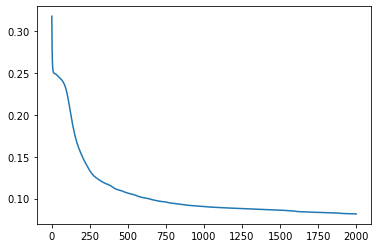

In [14]:
plt.plot(errors)

In [15]:
data_test = (np.random.rand(1000,2) * 2) - 1
y = train(data_test, 0.0001, params, training=False)
y = np.where(y >= 0.5, 1, 0)

In [ ]:
plt.plot()